# 演習3-3 CNN の特徴抽出

In [6]:
## 課題1: 特徴抽出とクラスタリング

import numpy as np
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.models import resnet18
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# データ準備
#data_transform = transforms.Compose([
#    transforms.Resize((224, 224)),
#    transforms.ToTensor()
#])
#cifar10 = datasets.CIFAR10(root='./data', train=False, transform=data_transform, download=True)
#data_loader = torch.utils.data.DataLoader(cifar10, batch_size=100, shuffle=False)
#
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3), # グレースケールをRGBに変換
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # 正規化
])
MNIST = datasets.MNIST(root='./data', train=False, transform=data_transform, download=True)
data_loader = torch.utils.data.DataLoader(MNIST, batch_size=100, shuffle=False)

# ResNet18モデル（事前学習済み）
model = resnet18(weights='DEFAULT')
model.eval()

# 特徴抽出
features = []
labels = []
with torch.no_grad():
    for inputs, targets in data_loader:
        outputs = model(inputs)
        features.append(outputs.numpy())
        labels.extend(targets.numpy())

features = np.concatenate(features)


In [14]:
# K-meansクラスタリング
kmeans = KMeans(n_clusters=20)
cluster_labels = kmeans.fit_predict(features)


In [15]:
import matplotlib.pyplot as plt


# プロット（次元削減後）
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)


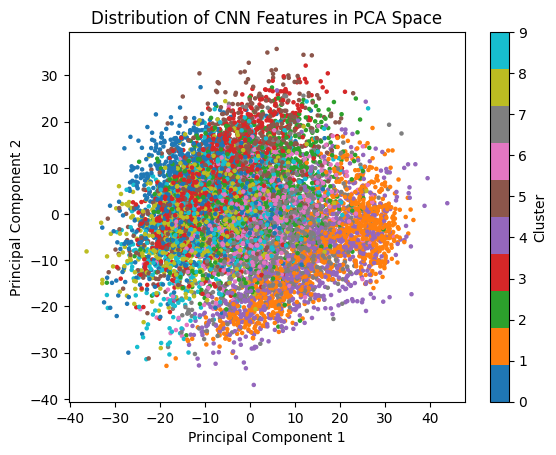

In [16]:

plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels, cmap='tab10', s=5)
plt.colorbar(label='Cluster')
plt.title('Distribution of CNN Features in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

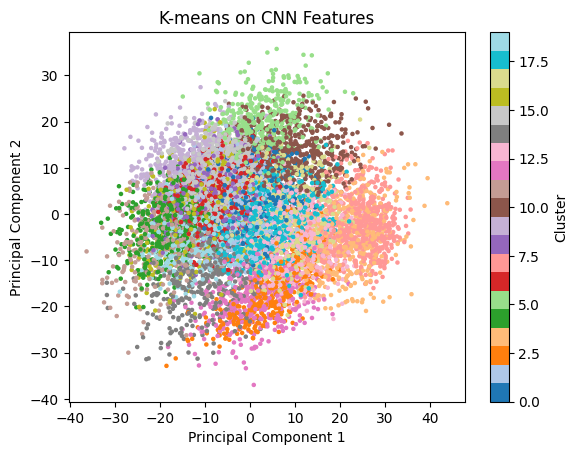

In [18]:
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='tab20', s=5)
plt.colorbar(label='Cluster')
plt.title('K-means on CNN Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Text(0, 0.5, 'TSNE 2')

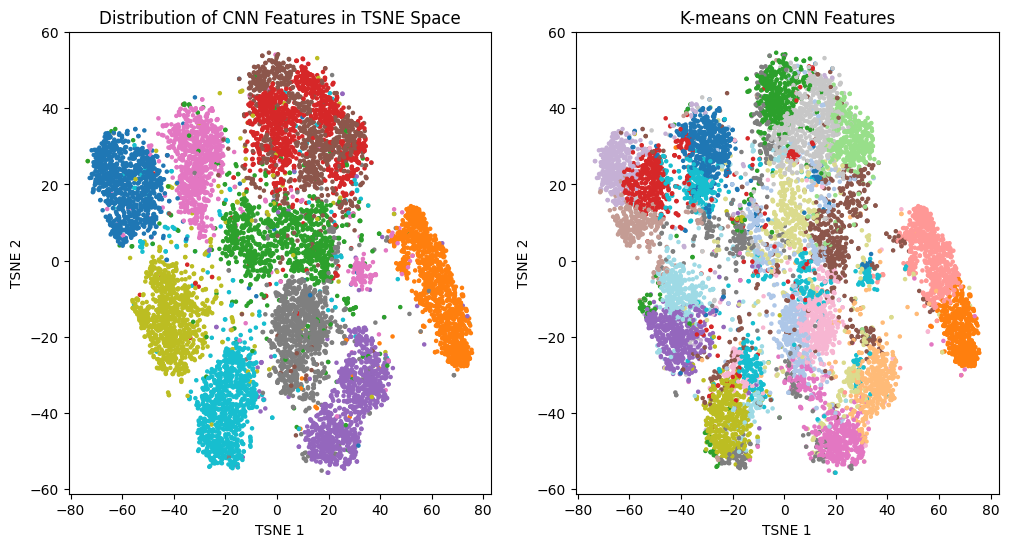

In [19]:
# TSNE で次元圧縮

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=50)
features_tsne = tsne.fit_transform(features)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels, cmap='tab10', s=5)
ax[0].set_title('Distribution of CNN Features in TSNE Space')
ax[0].set_xlabel('TSNE 1')
ax[0].set_ylabel('TSNE 2')
ax[1].scatter(features_tsne[:, 0], features_tsne[:, 1], c=cluster_labels, cmap='tab20', s=5)
ax[1].set_title('K-means on CNN Features')
ax[1].set_xlabel('TSNE 1')
ax[1].set_ylabel('TSNE 2')
